In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 54.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

In [ ]:
ds=xr.open_dataset('/content/drive/MyDrive/AP_HW/ERA5 Data/total_cloud_cover/tcc-2024.nc')
ds

<xarray.Dataset> Size: 933MB
Dimensions:     (valid_time: 2928, latitude: 209, longitude: 381)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 23kB 2024-01-01 ... 2024-12-31T21...
  * latitude    (latitude) float64 2kB 52.0 51.75 51.5 51.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 3kB 25.0 25.25 25.5 ... 119.5 119.8 120.0
    expver      (valid_time) <U4 47kB ...
Data variables:
    tcc         (valid_time, latitude, longitude) float32 933MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-26T09:28 GRIB to CDM+CF via cfgrib-0.9.1...

# MAM

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]


for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# olr ################
  # Load the files
  ds_tcc = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/total_cloud_cover/tcc-{year}.nc")
  tcc_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/tcc/tcc_climatology-mam.nc')


  ds_tcc=ds_tcc.sel(valid_time=time_range)
  ds_tcc=ds_tcc.mean(dim='valid_time',skipna=True)
  tcc_anom=ds_tcc-tcc_clim
  tcc_anom=tcc_anom.assign_coords(event_no=event_no)
  anom_list.append(tcc_anom)
# lshf_anom
tcc_events_anom_mam=xr.concat(anom_list,dim='event_no')
tcc_events_anom_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-mam.nc')

  0%|          | 0/104 [00:00<?, ?it/s]

# JJAS

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]


for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# olr ################
  # Load the files
  ds_tcc = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/total_cloud_cover/tcc-{year}.nc")
  tcc_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/tcc/tcc_climatology-jjas.nc')


  ds_tcc=ds_tcc.sel(valid_time=time_range)
  ds_tcc=ds_tcc.mean(dim='valid_time',skipna=True)
  tcc_anom=ds_tcc-tcc_clim
  tcc_anom=tcc_anom.assign_coords(event_no=event_no)
  anom_list.append(tcc_anom)

tcc_events_anom_jjas=xr.concat(anom_list,dim='event_no')
tcc_events_anom_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-jjas.nc')



  0%|          | 0/135 [00:00<?, ?it/s]

In [ ]:
print('done')

done


#Plot

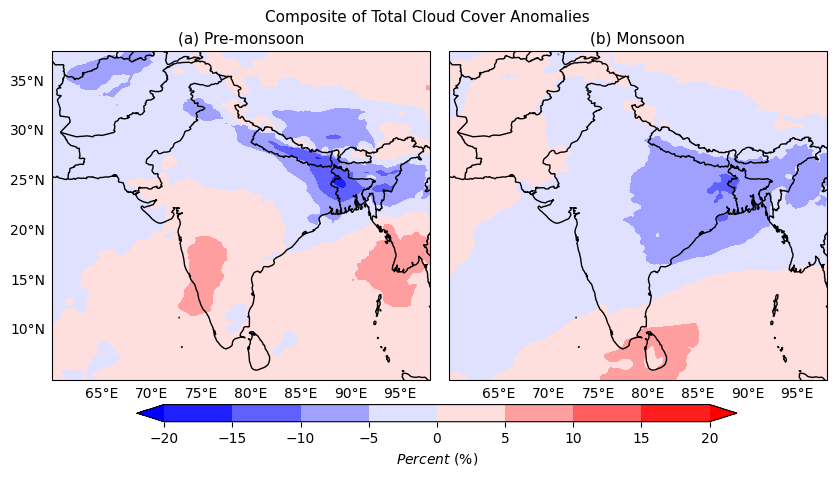

In [ ]:
levels=np.arange(-20,20+0.01,5)
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(ncols=2,subplot_kw={'projection':projection},figsize=(10, 25))

ax=axes[0]
tcc=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-mam.nc')

tcc=tcc.mean(dim='event_no',skipna=True)

lat_range=slice(38,5)
lon_range=slice(60,98)
tcc=tcc.sel(latitude=lat_range,longitude=lon_range)

latitude=tcc['latitude'].values
longitude=tcc['longitude'].values
contourf=ax.contourf(longitude,latitude,tcc.tcc*100,levels=levels,extend='both',cmap='bwr',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(a) Pre-monsoon",fontsize=11)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['left','bottom'],visible=False)

ax=axes[1]
tcc=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-jjas.nc')

tcc=tcc.mean(dim='event_no',skipna=True)

lat_range=slice(38,5)
lon_range=slice(60,98)
tcc=tcc.sel(latitude=lat_range,longitude=lon_range)

latitude=tcc['latitude'].values
longitude=tcc['longitude'].values
contourf=ax.contourf(longitude,latitude,tcc.tcc*100,levels=levels,extend='both',cmap='bwr',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(b) Monsoon",fontsize=11)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)

# Get the contour levels from the first subplot
cbar = plt.colorbar(contourf, ax=axes, orientation='horizontal', pad=0.01, fraction=0.02, aspect=35, label="${Percent}\ {(\%)}$")
cbar.set_ticks(levels[::1])  # Set the colorbar ticks to match the levels used in contour plots
# # Adjust colorbar position if needed
cbar.ax.set_position([0.21, 0.075, 0.6, 0.025]) # [left, bottom, width, height]
# plt.tight_layout()
plt.subplots_adjust( wspace=0.05,top=0.9)
plt.suptitle('Composite of Total Cloud Cover Anomalies', x=0.5, y=0.258,fontsize=11)
fig.savefig(f'/content/drive/MyDrive/AP_HW/Results/TCC/Composite_Anomaly_of_tcc.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print('done')

done
